In [3]:
import spladtool.spladtool_reverse as str
from spladtool.utils import SGD
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tqdm import tqdm, trange

# Logistic Regression

(200, 2) (200,)


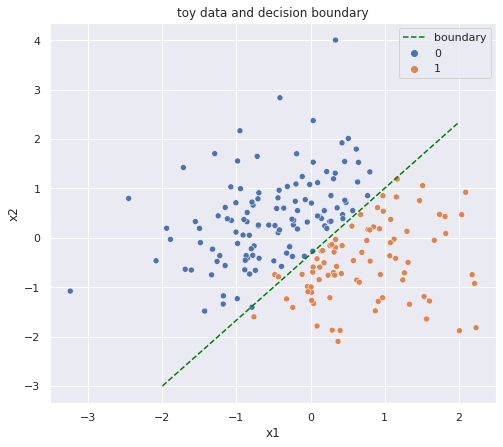

In [4]:
# We first create a toy dataset that is linear separable
# We chose a simple classification model with decision boundary being 4x1 - 3x2 > 1
np.random.seed(42)
x = np.random.randn(200, 2)
y = ((4 * x[:, 0] - 3 * x[:, 1]) > 1).astype(int)
x = x + np.random.randn(200, 2) * 0.1
plot_df = {
    'x1': x[:, 0],
    'x2': x[:, 1],
    'y': y
}
print(x.shape, y.shape)
sns.set()
plt.figure(figsize=(8, 7))
sns.scatterplot(data=plot_df, x='x1', y='x2', hue=y)
x_plot = np.arange(-2, 3)
y_plot = (4 * x_plot - 1) / 3
sns.lineplot(x=x_plot, y=y_plot, color='green', linestyle='--', label='boundary')
plt.title('toy data and decision boundary')
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 231.43it/s]


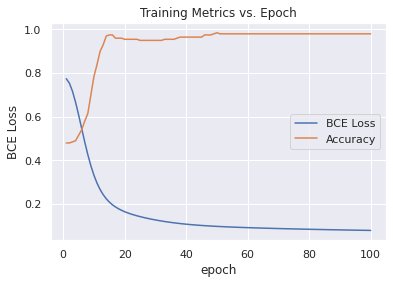

In [10]:
# define a simple logistic regression model
class MyModel(str.Module):
    def __init__(self):
        super().__init__()
        self.register_param(w1=str.tensor(np.random.randn()))
        self.register_param(w2=str.tensor(np.random.randn()))
        self.register_param(b=str.tensor(np.random.randn()))
    
    def forward(self, x):
        w1 = self.params['w1'].repeat(x.shape[0])
        w2 = self.params['w2'].repeat(x.shape[0])
        b = self.params['b'].repeat(x.shape[0])
        y = w1 * str.tensor(x[:, 0]) + w2 * str.tensor(x[:, 1]) + b
        return y

    
# define loss function and optimizer
model = MyModel()
criterion = str.BCELoss()
opt = SGD(model.parameters(), lr=0.1, momentum=0.9)

# training using SGD with momentum
losses = []
accs = []
for epoch in trange(100):
    outputs = model(x)
    targets = str.tensor(y.astype(float))
    loss = criterion(targets, outputs)
    preds = (outputs.data > 0.5).astype(int)
    acc = (preds == y).mean()
    opt.zero_grad()
    loss.backward()
    opt.step()
    losses.append(float(loss.data))
    accs.append(acc)

loss_df = {
    'epoch': np.arange(1, 101),
    'BCE Loss': losses,
    'Accuracy': accs
}

sns.lineplot(data=loss_df, x='epoch', y='BCE Loss', label='BCE Loss')
sns.lineplot(data=loss_df, x='epoch', y='Accuracy', label='Accuracy')
plt.title('Training Metrics vs. Epoch')
plt.show()

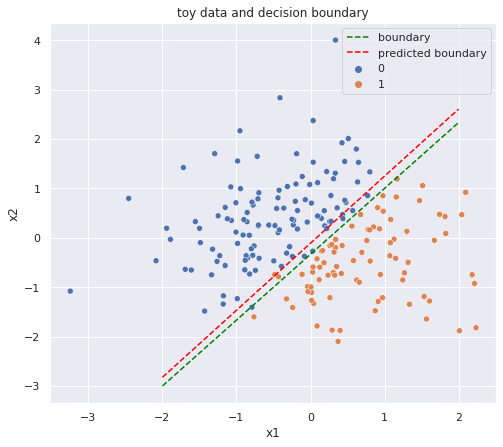

In [11]:
plot_df = {
    'x1': x[:, 0],
    'x2': x[:, 1],
    'y': y
}

w1 = float(model.params['w1'].data)
w2 = float(model.params['w2'].data)
b = float(model.params['b'].data)

sns.set()
plt.figure(figsize=(8, 7))
sns.scatterplot(data=plot_df, x='x1', y='x2', hue=y)
x_plot = np.arange(-2, 3)
y_plot = (4 * x_plot - 1) / 3
pred_plot = -(w1 * x_plot + b) / w2
sns.lineplot(x=x_plot, y=y_plot, color='green', linestyle='--', label='boundary')
sns.lineplot(x=x_plot, y=pred_plot, color='red', linestyle='--', label='predicted boundary')
plt.title('toy data and decision boundary')
plt.show()

# Polynomial Regression

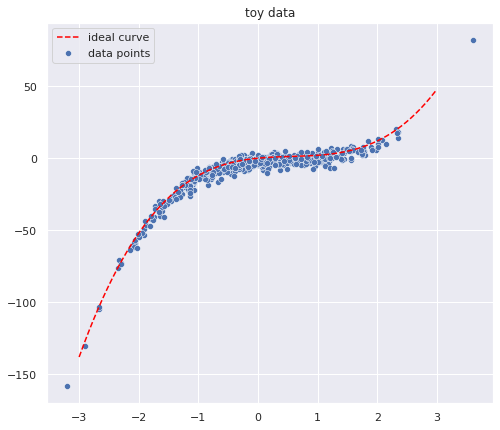

In [51]:
x = np.random.randn(500)
x_sq = (x ** 2)
x_cb = (x ** 3)
y = 4 * x - 5 * x_sq + 3 * x_cb + np.random.randn(500) * 3 - 2
sns.set()
plt.figure(figsize=(8, 7))
sns.scatterplot(x=x, y=y, label='data points')
x_plot = np.arange(-3, 3, 0.01)
y_plot = 4 * x_plot - 5 * (x_plot ** 2) + 3 * (x_plot ** 3)
sns.lineplot(x=x_plot, y=y_plot, color='red', linestyle='--', label='ideal curve')
plt.title('toy data')
plt.show()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1005.31it/s]


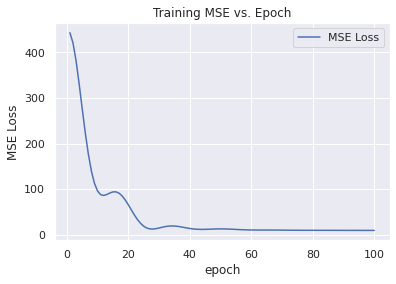

In [52]:
# define a polynomial regression model
class PolyModel(str.Module):
    def __init__(self):
        super().__init__()
        self.register_param(w1=str.tensor(np.random.randn()))
        self.register_param(w2=str.tensor(np.random.randn()))
        self.register_param(w3=str.tensor(np.random.randn()))
        self.register_param(b=str.tensor(np.random.randn()))
    
    def forward(self, x):
        w1 = self.params['w1'].repeat(x.shape[0])
        w2 = self.params['w2'].repeat(x.shape[0])
        w3 = self.params['w3'].repeat(x.shape[0])
        b = self.params['b'].repeat(x.shape[0])
        y = w1 * str.tensor(x) + w2 * str.tensor(x ** 2) + w3 * str.tensor(x ** 3) + b
        return y
    
    
model = PolyModel()
criterion = str.MSELoss()
opt = SGD(model.parameters(), lr=0.001, momentum=0.9)

# training using SGD with momentum
losses = []
for epoch in trange(100):
    outputs = model(x)
    targets = str.tensor(y.astype(float))
    loss = criterion(targets, outputs)
    opt.zero_grad()
    loss.backward()
    opt.step()
    losses.append(float(loss.data))

loss_df = {
    'epoch': np.arange(1, 101),
    'MSE Loss': losses,
}

sns.lineplot(data=loss_df, x='epoch', y='MSE Loss', label='MSE Loss')
plt.title('Training MSE vs. Epoch')
plt.show()

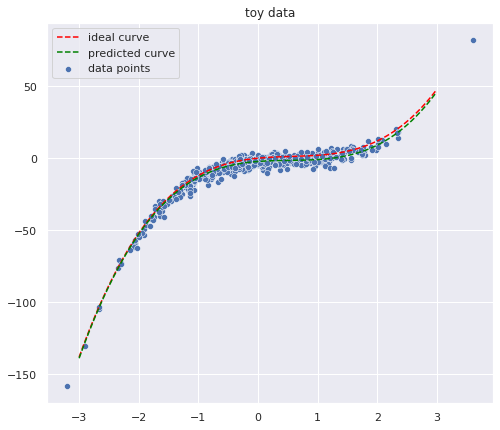

In [53]:
w1 = model.params['w1'].data
w2 = model.params['w2'].data
w3 = model.params['w3'].data
b = model.params['b'].data

sns.set()
plt.figure(figsize=(8, 7))
sns.scatterplot(x=x, y=y, label='data points')
x_plot = np.arange(-3, 3, 0.01)
y_plot = 4 * x_plot - 5 * (x_plot ** 2) + 3 * (x_plot ** 3)
y_pred = w1 * x_plot + w2 * (x_plot ** 2) + w3 * (x_plot ** 3) + b
sns.lineplot(x=x_plot, y=y_plot, color='red', linestyle='--', label='ideal curve')
sns.lineplot(x=x_plot, y=y_pred, color='green', linestyle='--', label='predicted curve')
plt.title('toy data')
plt.show()